<a href="https://colab.research.google.com/github/techfreakydeepak/Bike_sharing_demand_prediction/blob/main/bike_sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Let's import some important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Give the path of the folder to access all the csv data files
url='https://drive.google.com/file/d/1dZ7p614gC_iwxHwcj-1N0Lc155AGMTJS/view?usp=sharing' 
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

In [3]:
# Let's read the csv file
df_Bike_sharing_demand=pd.read_csv(url,encoding= 'unicode_escape')

Dataset First View

In [4]:
# check top five rows to get the overview of data
df_Bike_sharing_demand.head()



,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
# check bottom four rows to get the overview of data
df_Bike_sharing_demand.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


Dataset Rows & Columns count

In [6]:
# shape tell us rows and columns)
print('Shape of data is:' ,df_Bike_sharing_demand.shape)

Shape of data is: (8760, 14)


♦ By this we can say that in our dataset 8760 rows and 14 columns

Dataset Rows & Columns count







In [7]:
# shape tell us rows and columns)
print('Shape of data is:' ,df_Bike_sharing_demand.shape)

Shape of data is: (8760, 14)


In [8]:
# shape tell us rows and columns)
print('Shape of data is:' ,df_Bike_sharing_demand.shape)

Shape of data is: (8760, 14)


♦ By this we can say that in our dataset 8760 rows and 14 columns

Dataset Information

In [9]:
# Let's take information about data
df_Bike_sharing_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

♦ Here we see data type of "Date" column is object. We'll go ahead and convert it to datetime

Understanding Your Variables

Variables Description

In [10]:
# columns Name
df_Bike_sharing_demand.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

Variables Description

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

Attribute Information:

Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of he day


Temperature-Temperature in Celsius

Humidity- Humidity percentage in atmosphere

Windspeed- How fast is the wind blowing(m/s)

Visibility- Visibility(10m)

Dew point temperature- At this point the air cannot hold more

Water in the gas form(°C)

Solar Radiation- The energy emitted by the Sun(MJ/m2)

Rainfall- Rainfall in mm

Snowfall- snow fall in cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)







In [11]:
# check description about dataset
df_Bike_sharing_demand.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN



♦ Here we can divide it into two type

1-Numeric features - 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)

2- Categorical features - 'Seasons', 'Holiday', 'Functional Day'


Copy of our dataset

Now we will make a copy of our dataset so that any changes will not affect the original dataset

In [12]:
# copy of dataset
df=df_Bike_sharing_demand.copy()

check, our copied data is perfect or not




In [13]:
# check top five row of our copied data
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Check Unique Values for Categorical features.

In [14]:
# for 'Functioning Day'
df['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [15]:
# for 'Seasons'
df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [16]:
# for Holiday
df['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

Null Values

In [17]:
# let's check null values 
null_values_in_data=df.isnull().sum().sort_values(ascending=False)
print(null_values_in_data)

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


Here we see there is no any null vlaues in our dataset

Duplicate Values

In [18]:
# let's check duplicate values in our dataset
len(df[df.duplicated()])

0

we find there is no any duplicate value

Now change data type of "Date" columne

In [19]:

# we can see that data type of date is object we change it into datetime
df['Date']=pd.to_datetime(df['Date'])


Check data type of our all columns

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

Now data type of each column is perfect

* Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables*

EDA


Now check the distribution of our dependent variable

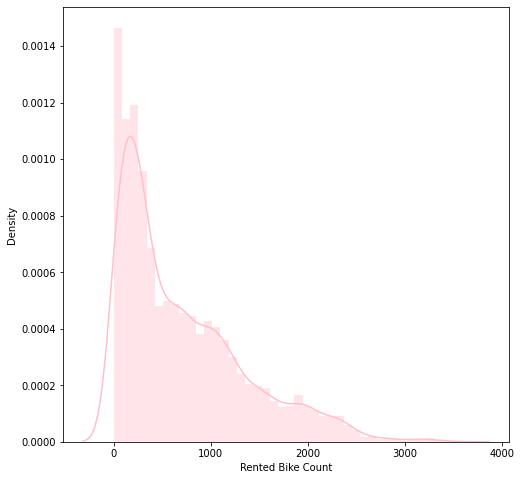

In [21]:
# Dependent variable 'Rented Bike Count'
plt.figure(figsize=(8,8))
sns.distplot(df['Rented Bike Count'],color="PINK");

♦ Here we can clearly see that the distribution of our dependent variable is Right skewed.

♦ we need to transform our dependent variable

In [22]:
# change data type of our dependent variable
df['Rented Bike Count'] = df['Rented Bike Count'].astype(float)

Let's check which transform make our dependent variable in normally distributed

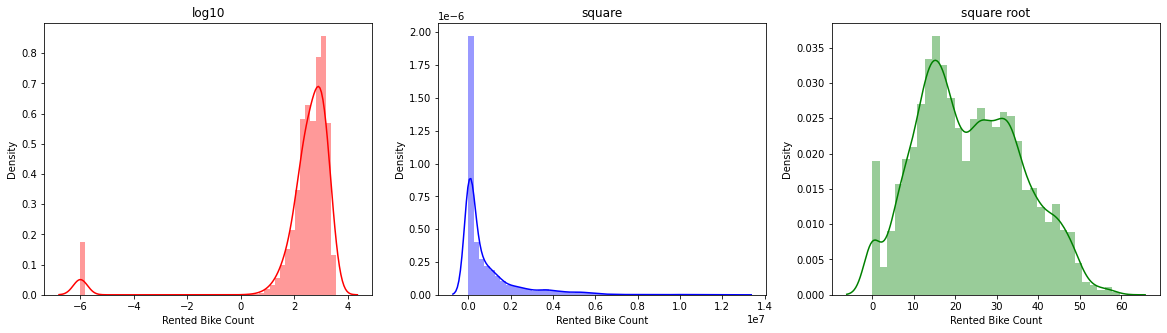

In [23]:
# we apply log, square  and square root transform
fig,axes = plt.subplots(1,3,figsize=(20,5))
sns.distplot(np.log10(df['Rented Bike Count']+0.000001),ax=axes[0],color="r").set_title('log10')
sns.distplot(df['Rented Bike Count']**2,ax=axes[1],color="b").set_title('square')
sns.distplot(np.sqrt(df['Rented Bike Count']),ax=axes[2],color="g").set_title('square root');

Here we can see clearly that square root transform make our data normally distributed

Now we extract our numerical features

In [24]:
# These are the numerical features
numeric_features = df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

Now we see the distribution of our numerical features except "Rented Bike Count". Because we have already seen the distribution of "Rented Bike Count"

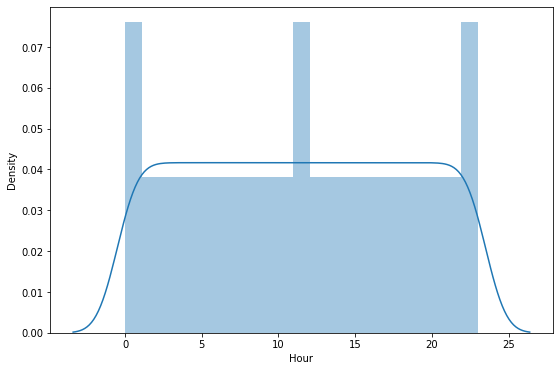

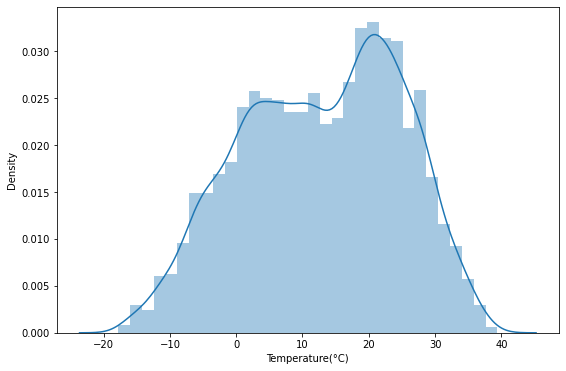

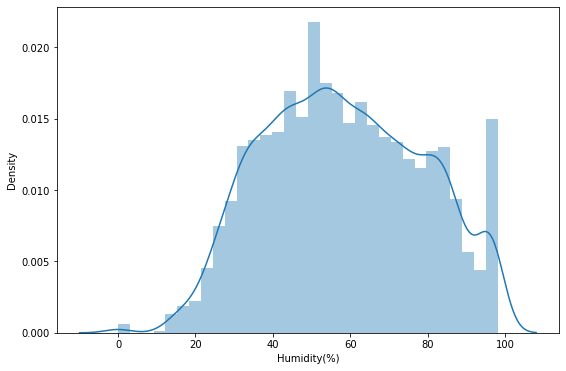

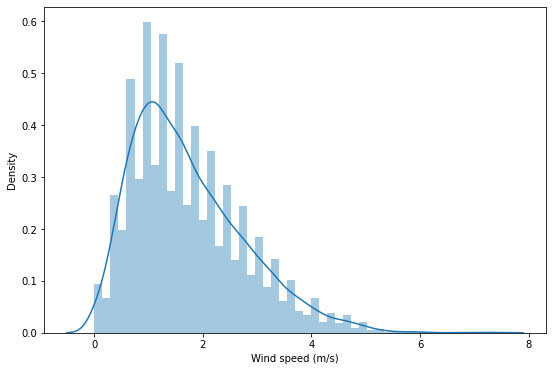

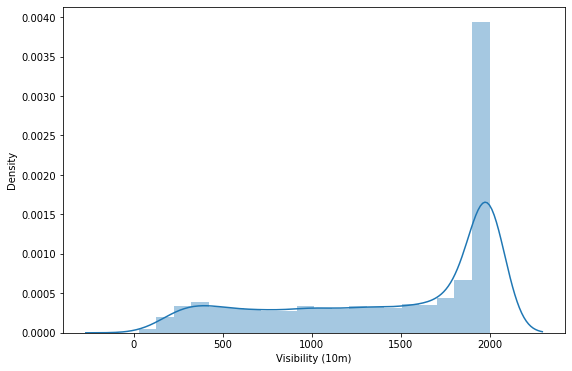

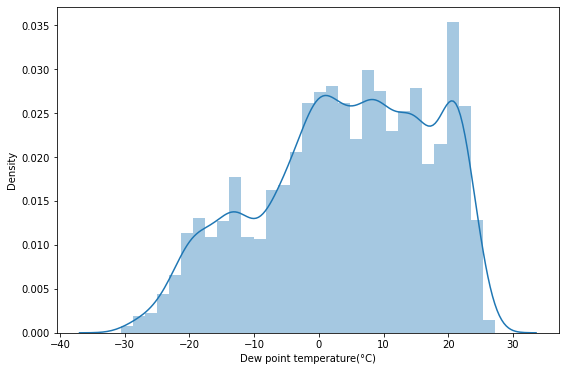

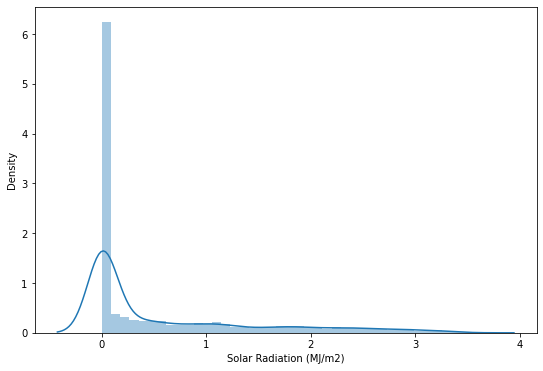

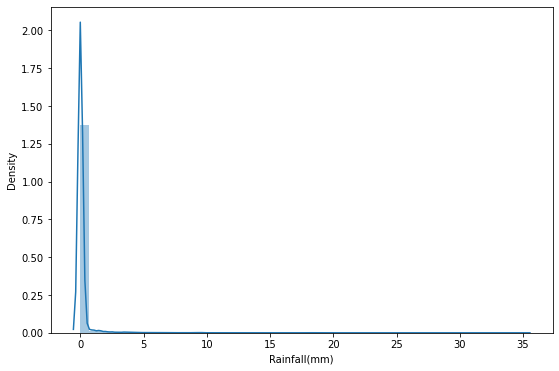

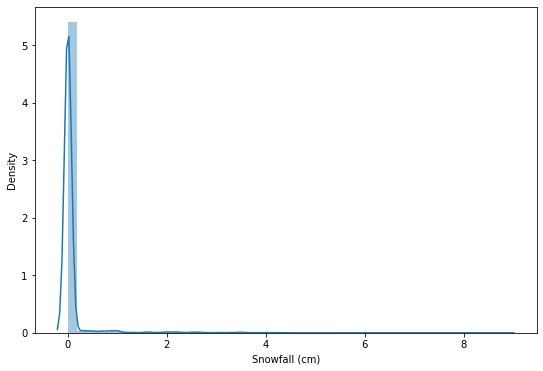

In [25]:
# Distribution of numerical features
for col in numeric_features[:]:
  if col=="Rented Bike Count":
      pass
  else:
    fig = plt.figure(figsize=(9, 6))
    sns.distplot(df[col])

Here we can see that some of the features are not perfectly distributed. Further we'll fix it

Now we will see the distribution of our numerical features about Mean and median

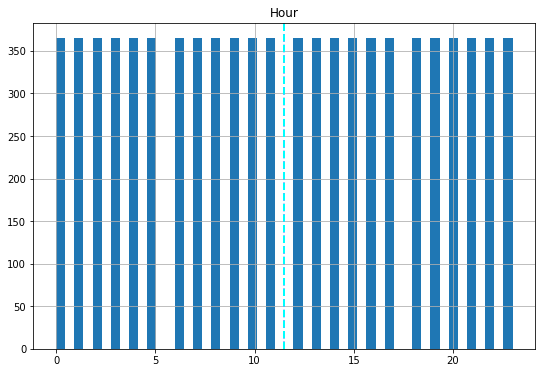

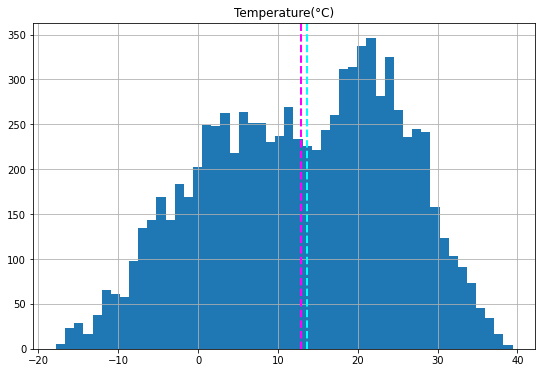

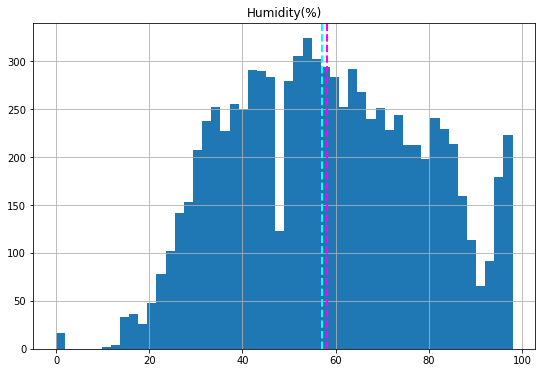

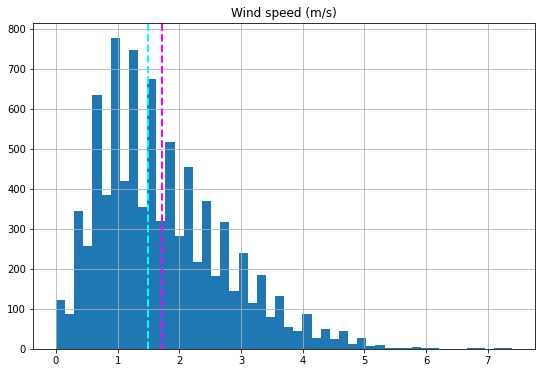

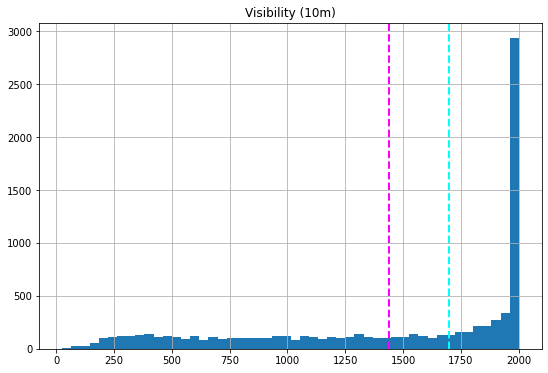

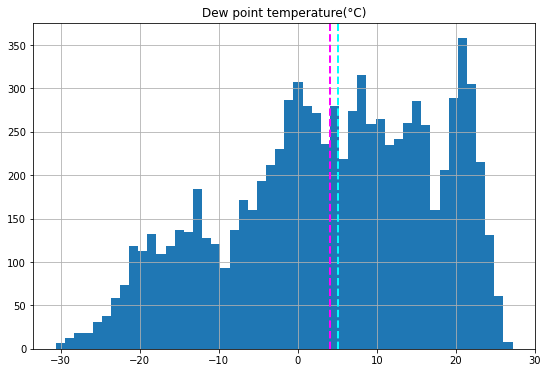

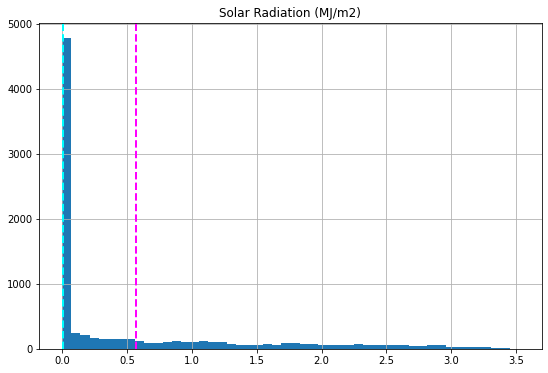

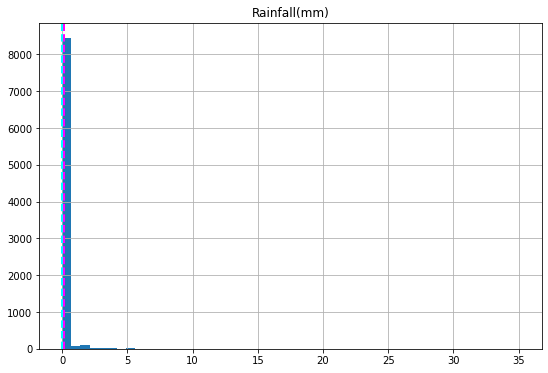

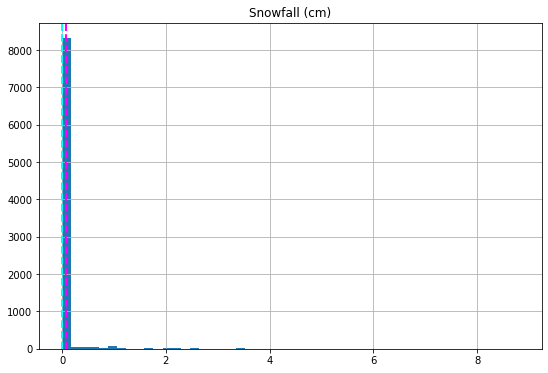

In [26]:
# distribution about mean and median
for col in numeric_features[:]:
  if col=='Rented Bike Count':
    pass
  else:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

Now plot Regression Plot

♦ Here we see the linear relationships between every numeric features to Rented Bike Count

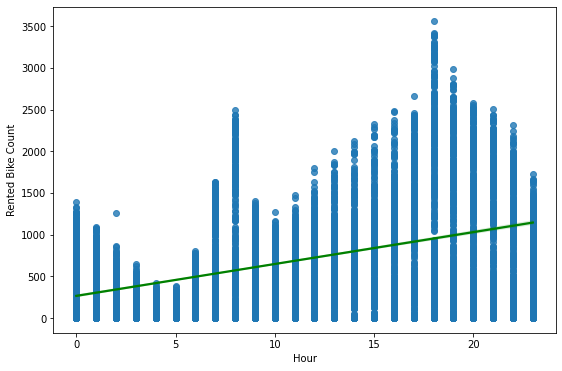

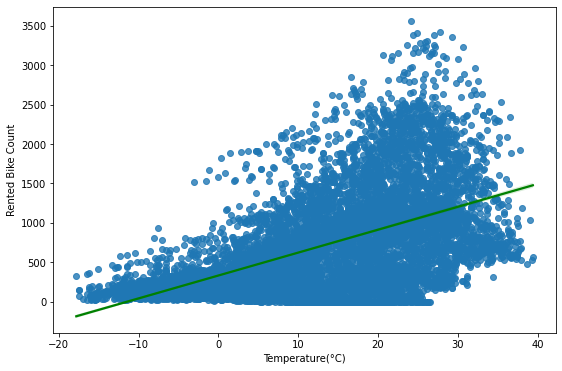

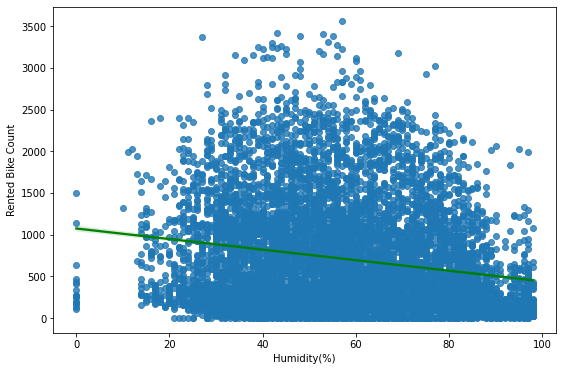

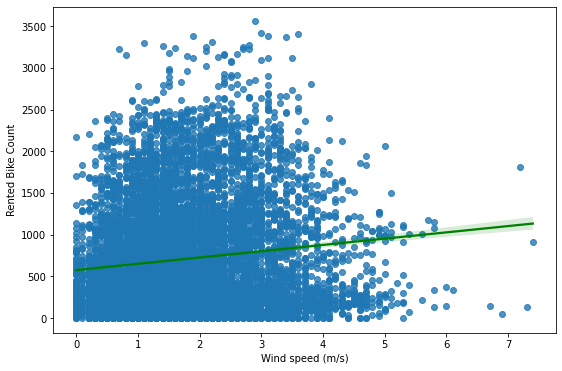

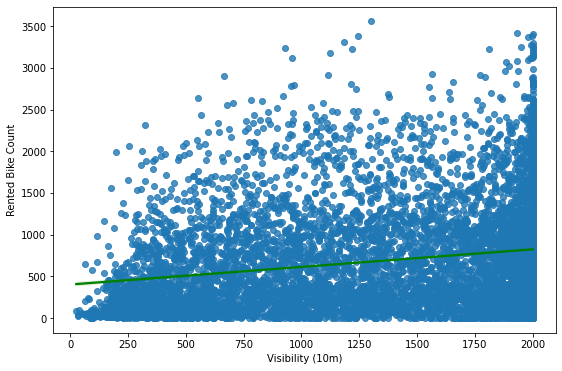

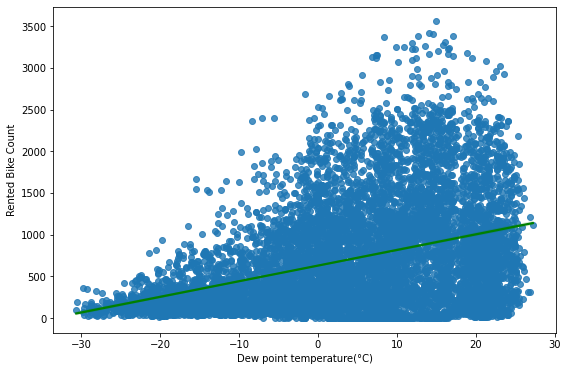

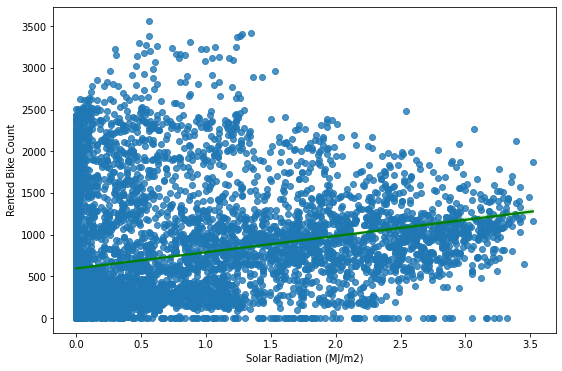

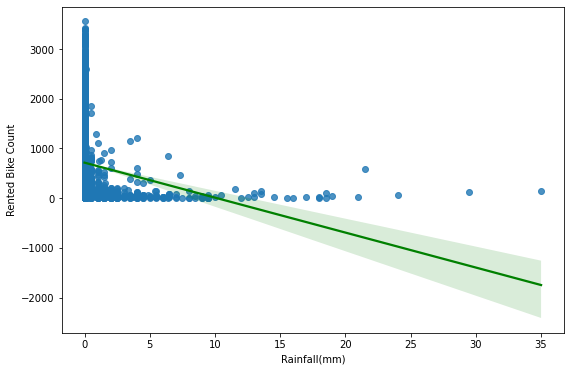

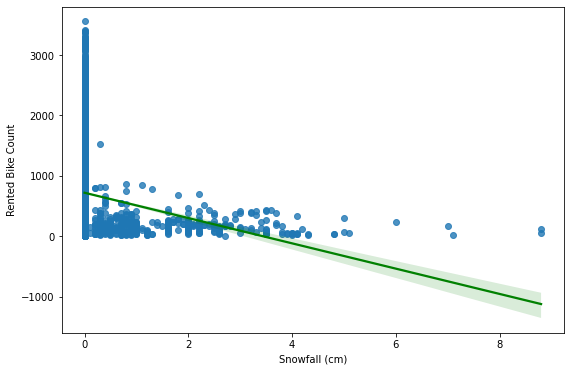

In [27]:
for col in numeric_features[:]:
  if col == 'Rented Bike Count':
    pass
  else:
    fig = plt.figure(figsize=(9, 6))
    sns.regplot(x=df[col],y=df["Rented Bike Count"],line_kws={"color": "green"})
  
  plt.show()

In above plot we can see that some features positive related and some are negatively related with Rented Bike Count

CHECK **OUTLIERS**

For outliers we have to plot box plot

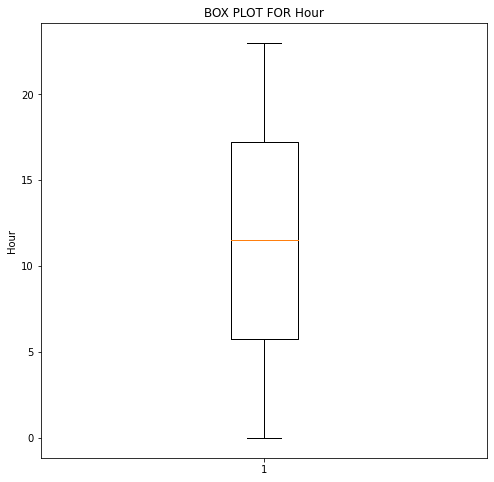

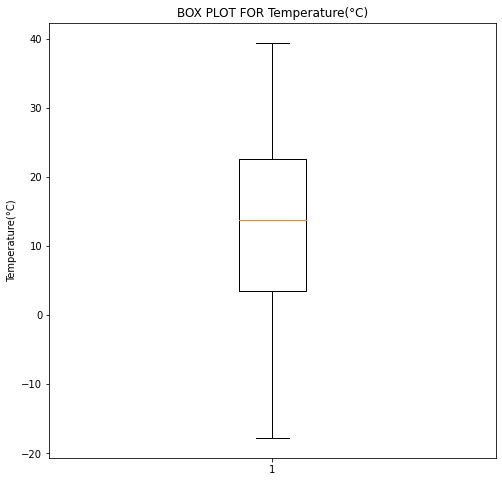

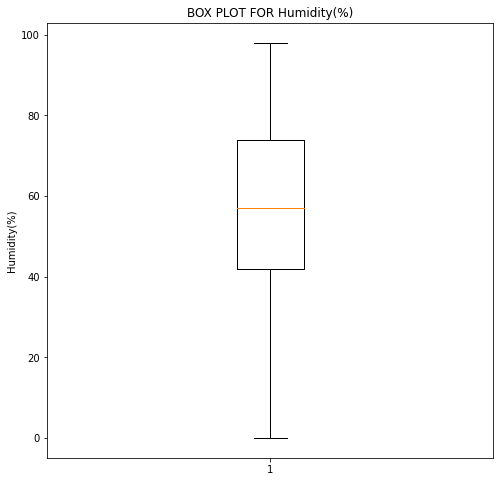

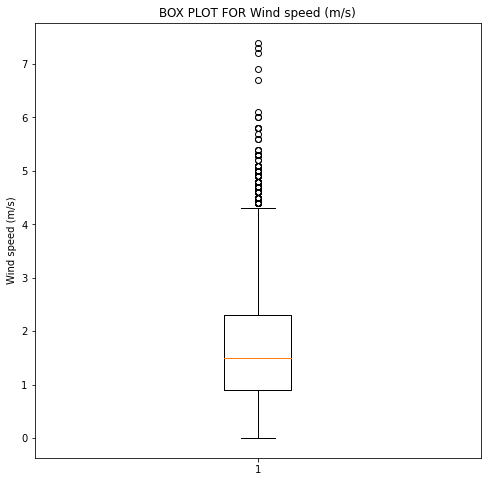

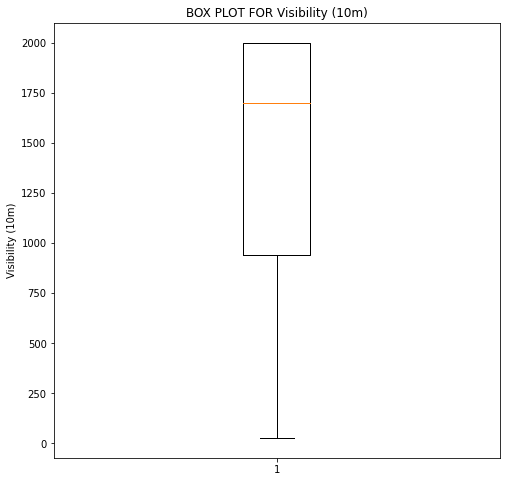

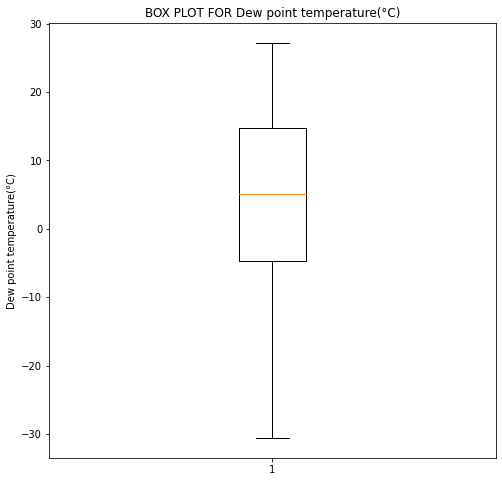

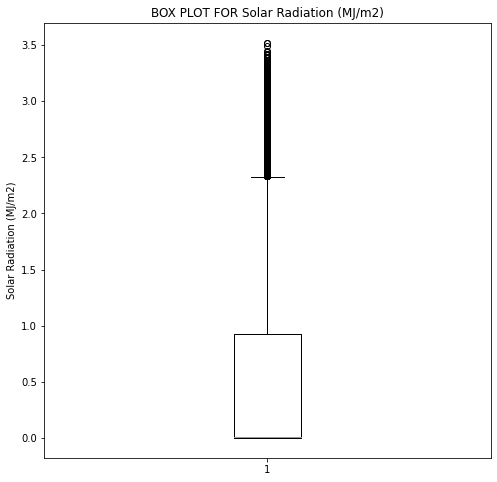

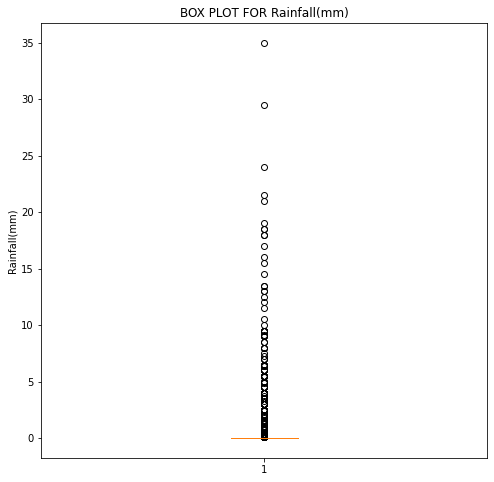

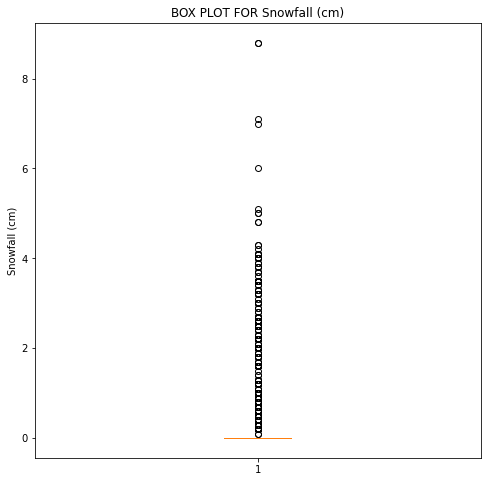

In [28]:
# Box plot for numeric features
for col in numeric_features[1:]:
         plt.figure(figsize=(8,8))
         plt.boxplot(df[col])
         plt.ylabel(col)
         plt.title(f'BOX PLOT FOR {col}');

In above box plot we see some outliers in 'Wind speed (m/s)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)' columns



In [30]:
# here we see some outlier in some coulumn
outlier_column=['Wind speed (m/s)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']

**Let's remove outliers**

In [31]:
# find  q1  and q3 for outliers column

q1=df[outlier_column].quantile(0.25)
q3=df[outlier_column].quantile(0.75)
print(q1)
print(q3)

Wind speed (m/s)           0.9
Solar Radiation (MJ/m2)    0.0
Rainfall(mm)               0.0
Snowfall (cm)              0.0
Name: 0.25, dtype: float64
Wind speed (m/s)           2.30
Solar Radiation (MJ/m2)    0.93
Rainfall(mm)               0.00
Snowfall (cm)              0.00
Name: 0.75, dtype: float64


In [32]:
# find iqr for outlier columns
iqr=q3-q1
lower_acceptable_limt=q1-iqr*1.5
upper_acceptable_limt=q3+iqr*1.5
print(lower_acceptable_limt)
print(upper_acceptable_limt)

Wind speed (m/s)          -1.200
Solar Radiation (MJ/m2)   -1.395
Rainfall(mm)               0.000
Snowfall (cm)              0.000
dtype: float64
Wind speed (m/s)           4.400
Solar Radiation (MJ/m2)    2.325
Rainfall(mm)               0.000
Snowfall (cm)              0.000
dtype: float64


In [33]:
# for removing outliers, we replace outler to upper acceptable limit and lower acceptable limit of Solar radiation
df.loc[df['Solar Radiation (MJ/m2)']>upper_acceptable_limt['Solar Radiation (MJ/m2)'],'Solar Radiation (MJ/m2)']=upper_acceptable_limt['Solar Radiation (MJ/m2)']
df.loc[df['Solar Radiation (MJ/m2)']<lower_acceptable_limt['Solar Radiation (MJ/m2)'],'Solar Radiation (MJ/m2)']=lower_acceptable_limt['Solar Radiation (MJ/m2)']

In [34]:
# for removing outliers, we replace outlier to upper acceptable limit and lower acceptable limit of wind speed
df.loc[df['Wind speed (m/s)']>upper_acceptable_limt['Wind speed (m/s)'],'Wind speed (m/s)']=upper_acceptable_limt['Wind speed (m/s)']
df.loc[df['Wind speed (m/s)']<lower_acceptable_limt['Wind speed (m/s)'],'Wind speed (m/s)']=lower_acceptable_limt['Wind speed (m/s)']

In [35]:
# for removing outliers from Snowfall we replace outliers to  0.95 quantile and 0.05 quantile 
df.loc[df['Snowfall (cm)']>df['Snowfall (cm)'].quantile(0.95),'Snowfall (cm)']=df['Snowfall (cm)'].quantile(0.95)
df.loc[df['Snowfall (cm)']<df['Snowfall (cm)'].quantile(0.05),'Snowfall (cm)']=df['Snowfall (cm)'].quantile(0.05)

In [36]:
# for removing outliers from raminfall we replace outliers to  0.95 quantile and 0.05 quantile 
df.loc[df['Rainfall(mm)']>df['Rainfall(mm)'].quantile(0.95),'Rainfall(mm)']=df['Rainfall(mm)'].quantile(0.95)
df.loc[df['Rainfall(mm)']<df['Rainfall(mm)'].quantile(0.05),'Rainfall(mm)']=df['Rainfall(mm)'].quantile(0.05)

In [37]:
# let's check our data after removing outliers
df.shape

(8760, 14)

After removing outliers we have 8760 rows and 14 columns

*Now let's do some feature engineering *

In [38]:
# extract some features from date column
df['Month'] = df.Date.dt.month_name()
df['day']=df.Date.dt.day_name()

We get 'month name' and 'day name' from Date column



In [40]:
# Remove Date column because we  have extricated important features from Date column
df.drop(['Date'], axis=1,inplace=True)

In [39]:
# Now check our columns name
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,day
0,2017-01-12,254.0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,January,Thursday
1,2017-01-12,204.0,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,January,Thursday
2,2017-01-12,173.0,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,January,Thursday
3,2017-01-12,107.0,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,January,Thursday
4,2017-01-12,78.0,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,January,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003.0,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,November,Friday
8756,2018-11-30,764.0,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,November,Friday
8757,2018-11-30,694.0,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,November,Friday
8758,2018-11-30,712.0,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,November,Friday


**Now let's do EDA in categorical data**

In [41]:
# Total number of bike rented in particular Season
no_of_bikeshare_in_season=df.groupby(['Seasons'])['Rented Bike Count'].sum().sort_values(ascending=False).reset_index()
no_of_bikeshare_in_season

,Seasons,Rented Bike Count
0,Summer,2283234.0
1,Autumn,1790002.0
2,Spring,1611909.0
3,Winter,487169.0


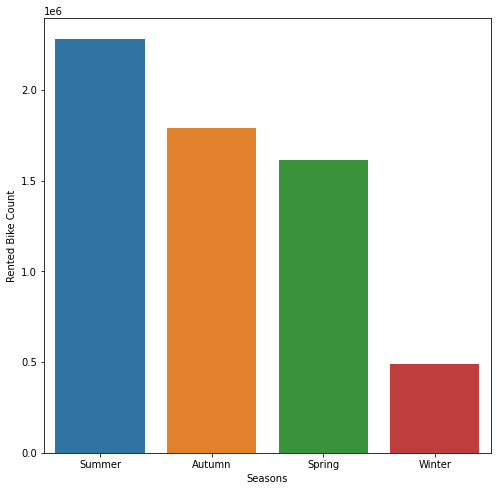

In [42]:
# Plot a bar plot to show the rented bike count in seasons
plt.figure(figsize=(8,8))
sns.barplot(data=no_of_bikeshare_in_season, x="Seasons", y="Rented Bike Count");

♦ In above bar plot we can see most people rented bike in summer season

♦ Because the weather is warmer and more favorable for outdoor activities

♦ In winter season due to cold weather,snow and poor visibility people don't prefer ranted bike

In [43]:
# Total number of bike rented in  holiday and non holiday
no_of_bikeshare_in_Holiday=df.groupby(['Holiday'])['Rented Bike Count'].sum().reset_index()
no_of_bikeshare_in_Holiday

,Holiday,Rented Bike Count
0,Holiday,215895.0
1,No Holiday,5956419.0


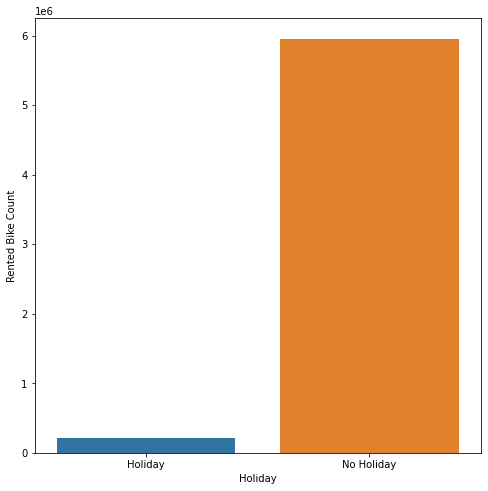

In [44]:
#  Plot a bar plot to show the rented bike count in holiday and non holiday
plt.figure(figsize=(8,8))
sns.barplot(data=no_of_bikeshare_in_Holiday, x="Holiday", y="Rented Bike Count");

♦ In above bar plot we can say that in non holiday people go to offices and they rented bike

♦ But people take bikes on rent to Roaming on holidays.

In [45]:
# Total number of bike rented in Functioning Day
no_of_bikeshare_in_Functioning_Day=df.groupby(['Functioning Day'])['Rented Bike Count'].sum().reset_index()
no_of_bikeshare_in_Functioning_Day

,Functioning Day,Rented Bike Count
0,No,0.0
1,Yes,6172314.0


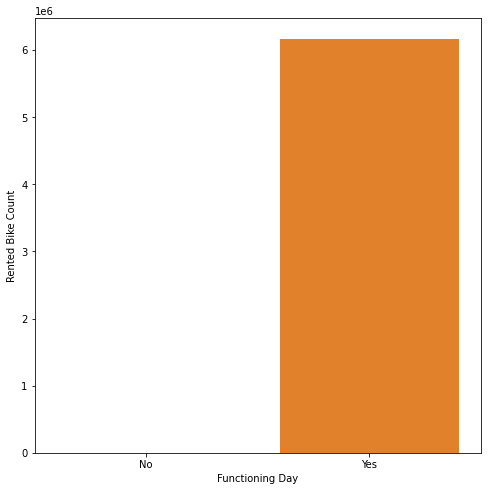

In [46]:
#  Plot a bar plot to show the rented bike count in Functioning Day
plt.figure(figsize=(8,8))
sns.barplot(data=no_of_bikeshare_in_Functioning_Day, x="Functioning Day", y="Rented Bike Count");

♦ In above bar plot we can say that people rented bike in function day

In [47]:
# total number of bike rented in every month
no_of_bikeshare_in_Month=df.groupby(['Month'])['Rented Bike Count'].sum().sort_values(ascending=False).reset_index()
no_of_bikeshare_in_Month

,Month,Rented Bike Count
0,June,706728.0
1,July,691339.0
2,May,665948.0
3,October,626988.0
4,August,614190.0
5,April,556219.0
6,September,499326.0
7,November,493412.0
8,March,455037.0
9,December,311771.0


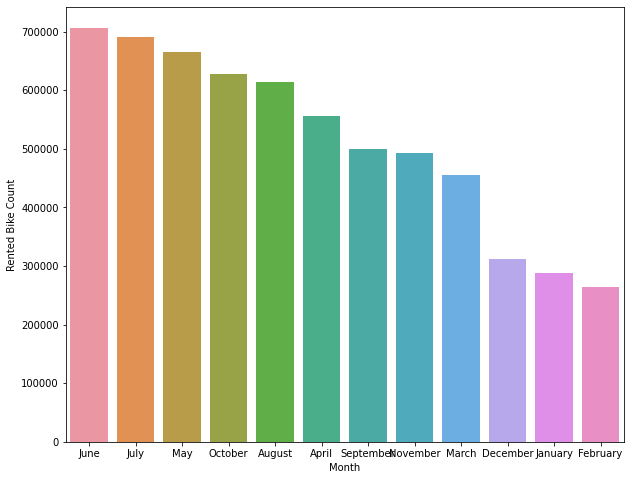

In [48]:
#  Plot a bar plot to show the rented bike count in "Month"
plt.figure(figsize=(10,8))
sns.barplot(data=no_of_bikeshare_in_Month, x="Month", y="Rented Bike Count");

♦ In above bar plot we can say that most of the bike rented in june and july month because this is summer time and weather is warmer and more favorable for outdoor activities

♦ In December to march this is winter time so due to cold weather,snow and poor visibility people don't prefer ranted bike

In [49]:
# total number of bike rented in weekday
no_of_bikeshare_in_day=df.groupby(['day'])['Rented Bike Count'].sum().sort_values(ascending=False).reset_index()
no_of_bikeshare_in_day

,day,Rented Bike Count
0,Thursday,928267.0
1,Saturday,911475.0
2,Wednesday,908871.0
3,Friday,898966.0
4,Monday,863563.0
5,Tuesday,862877.0
6,Sunday,798295.0


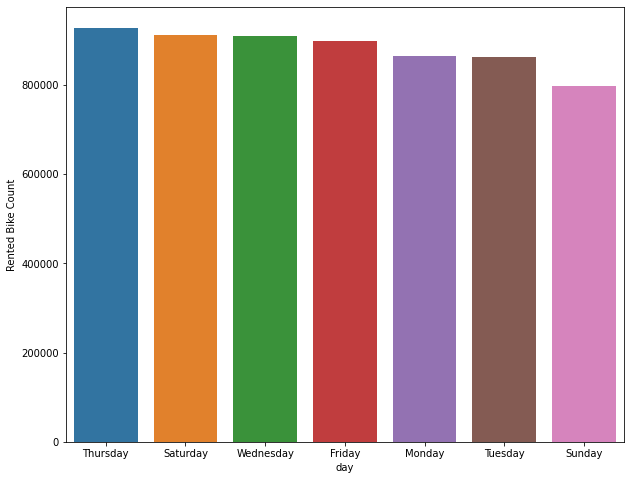

In [50]:
#  Plot a bar plot to show the rented bike count in "weekday"
plt.figure(figsize=(10,8))
sns.barplot(data=no_of_bikeshare_in_day, x="day", y="Rented Bike Count");

♦ We know that sunday is off day so people don't go to office that's why rented bike count is low in sunday



In [51]:
# total number of bike rented in 'per hour'
average_of_bikeshare_in_hour=df.groupby(['Hour'])['Rented Bike Count'].sum().reset_index()
average_of_bikeshare_in_hour

,Hour,Rented Bike Count
0,0,197633.0
1,1,155557.0
2,2,110095.0
3,3,74216.0
4,4,48396.0
5,5,50765.0
6,6,104961.0
7,7,221192.0
8,8,370731.0
9,9,235784.0


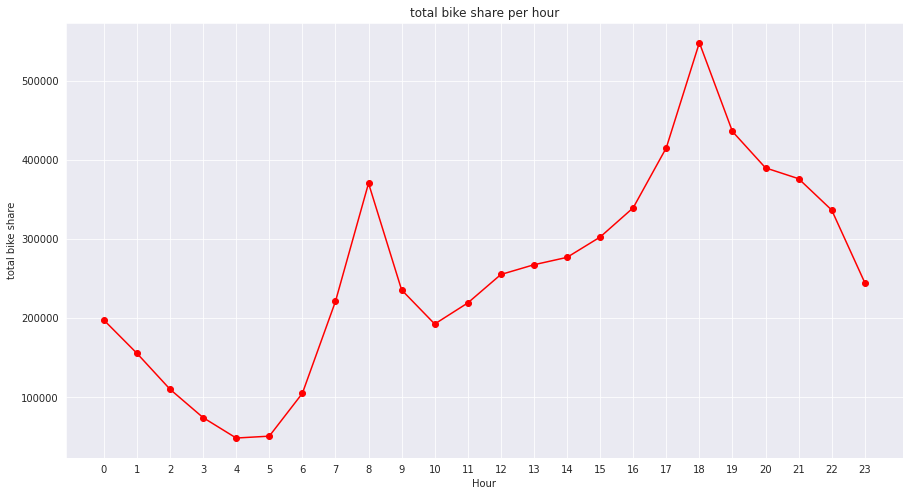

In [53]:
#  Plot a line chart to show the rented bike count in "per hour"
plt.figure(figsize=(15,8))
sns.set_style("darkgrid")
plt.plot(average_of_bikeshare_in_hour['Hour'],average_of_bikeshare_in_hour['Rented Bike Count'], marker='o', c='red')
plt.xlabel('Hour')
plt.ylabel('total bike share')
plt.title('total bike share per hour')
plt.xticks(average_of_bikeshare_in_hour['Hour']);

♦ we know that 7am - 9am people go to office that's why rented bike count is high this time

♦ similarly people return from office at 5pm - 7pm that's why rented bike count is high at this time

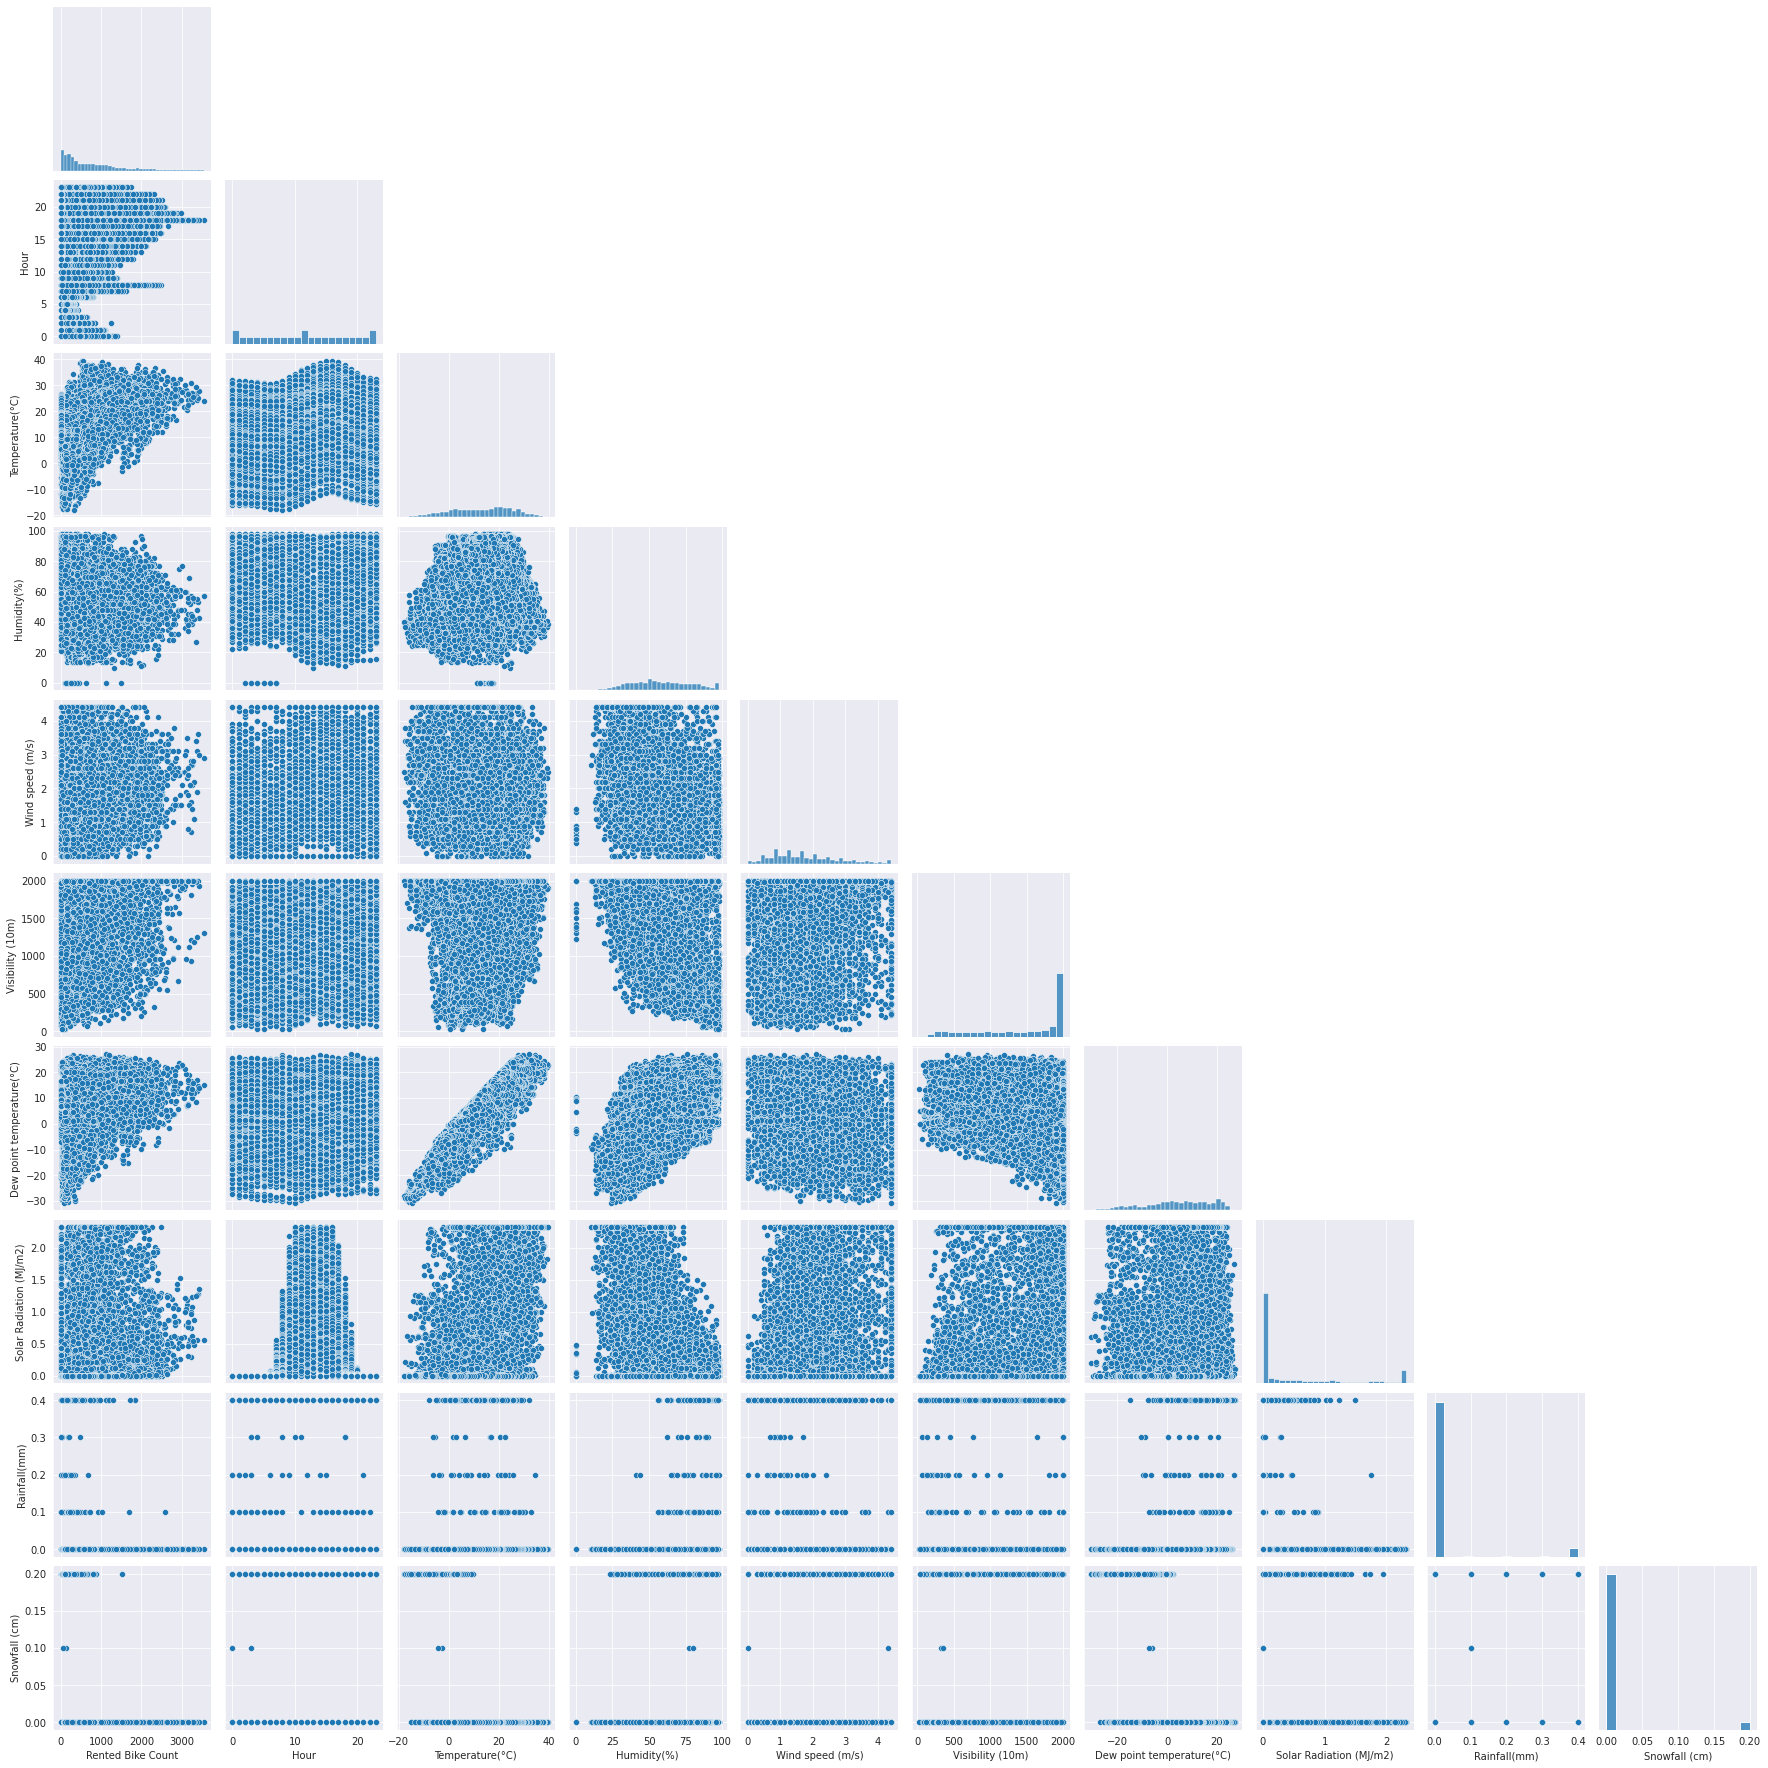

In [54]:
#ploting pairplot for more info
sns.pairplot(df, corner=True)

♦ pair plot shows the correlation




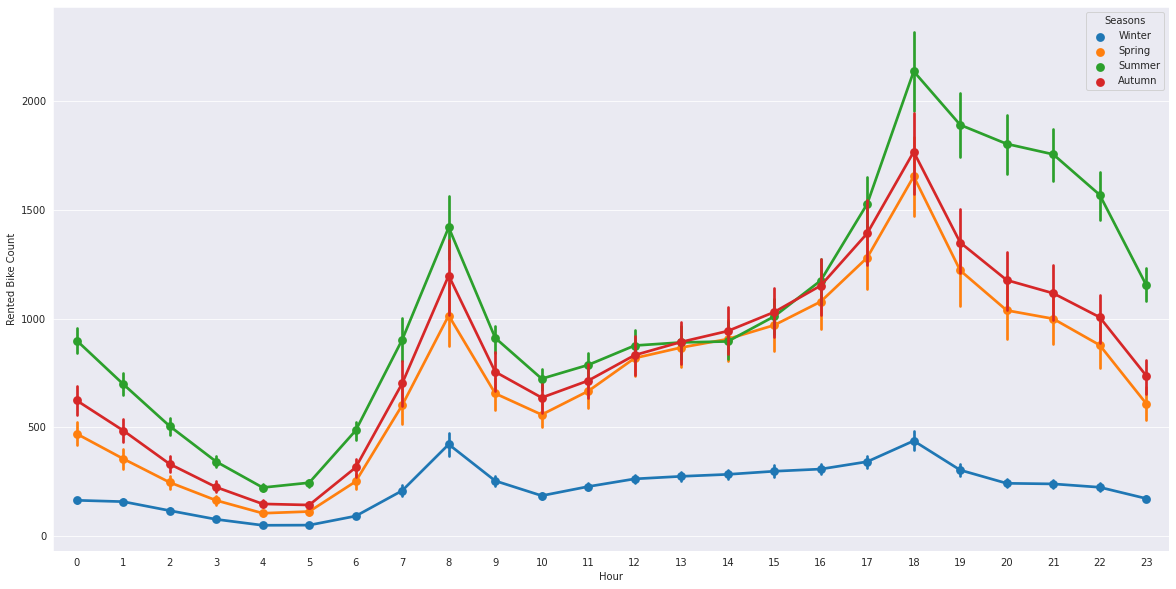

In [55]:
 #plot point plot for categorical column
plt.figure(figsize=(20,10))
sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df["Seasons"]);


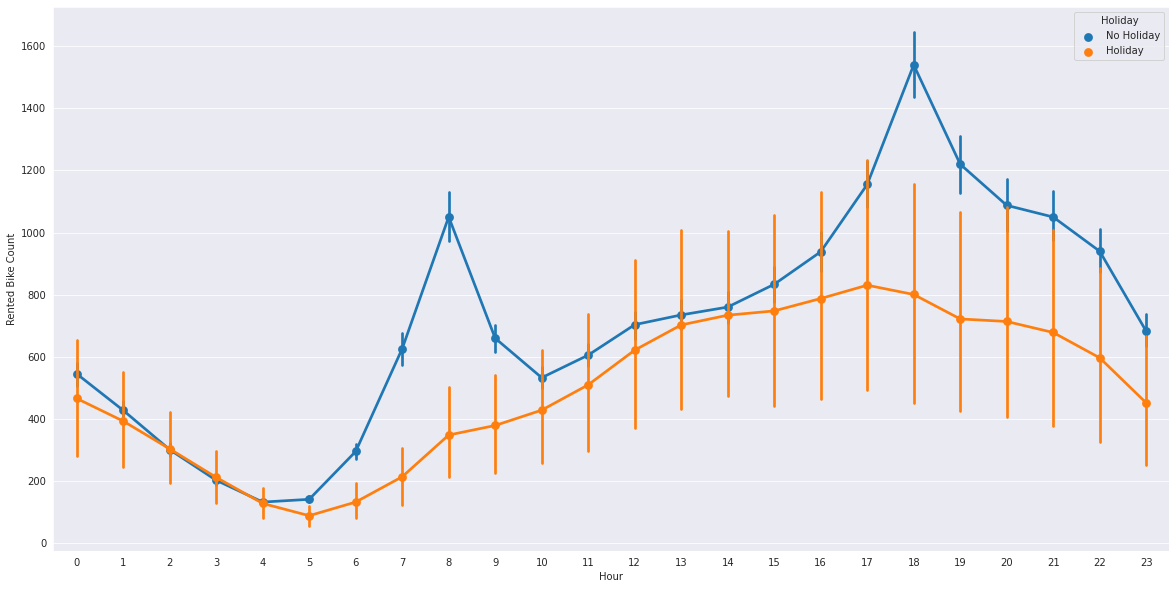

In [56]:
plt.figure(figsize=(20,10))
sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df["Holiday"]);



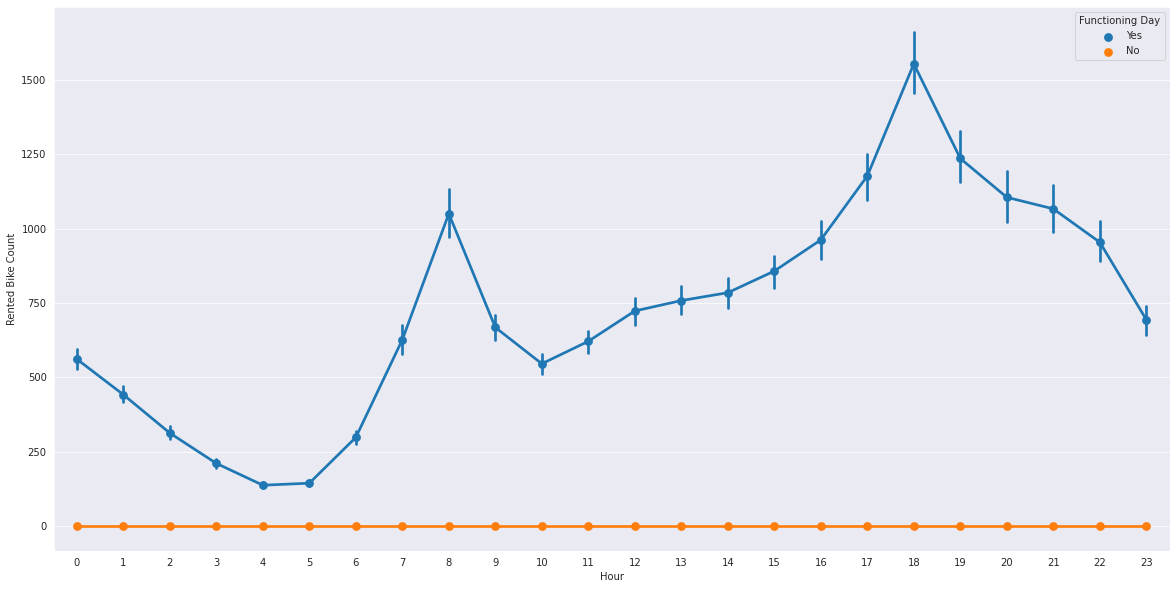

In [57]:
plt.figure(figsize=(20,10))
sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df["Functioning Day"]);


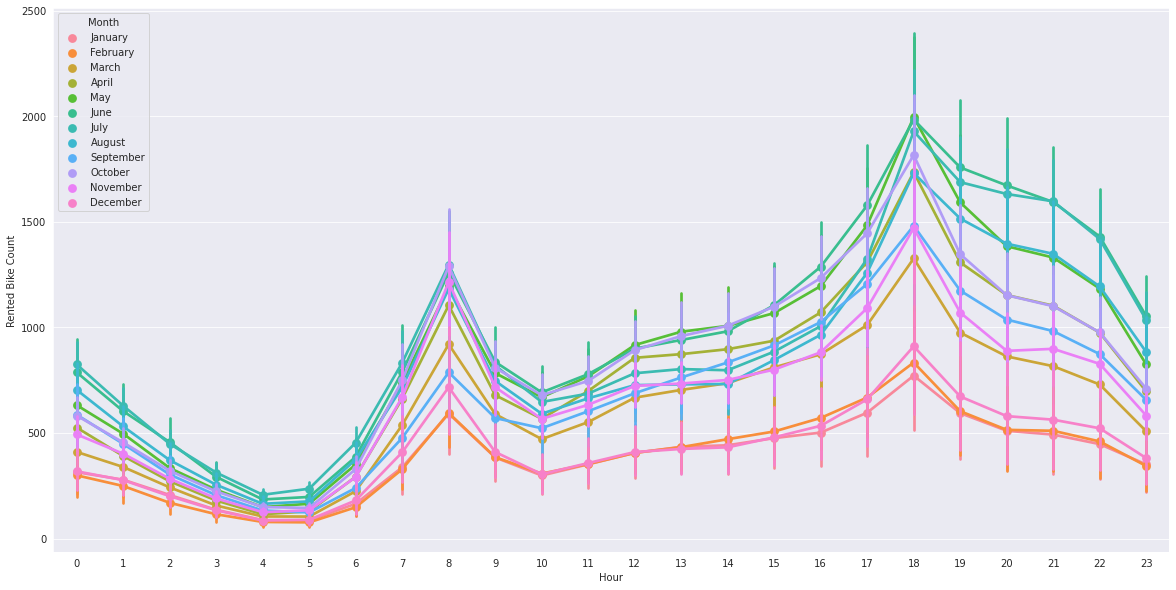

In [58]:
plt.figure(figsize=(20,10))
sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df["Month"]);

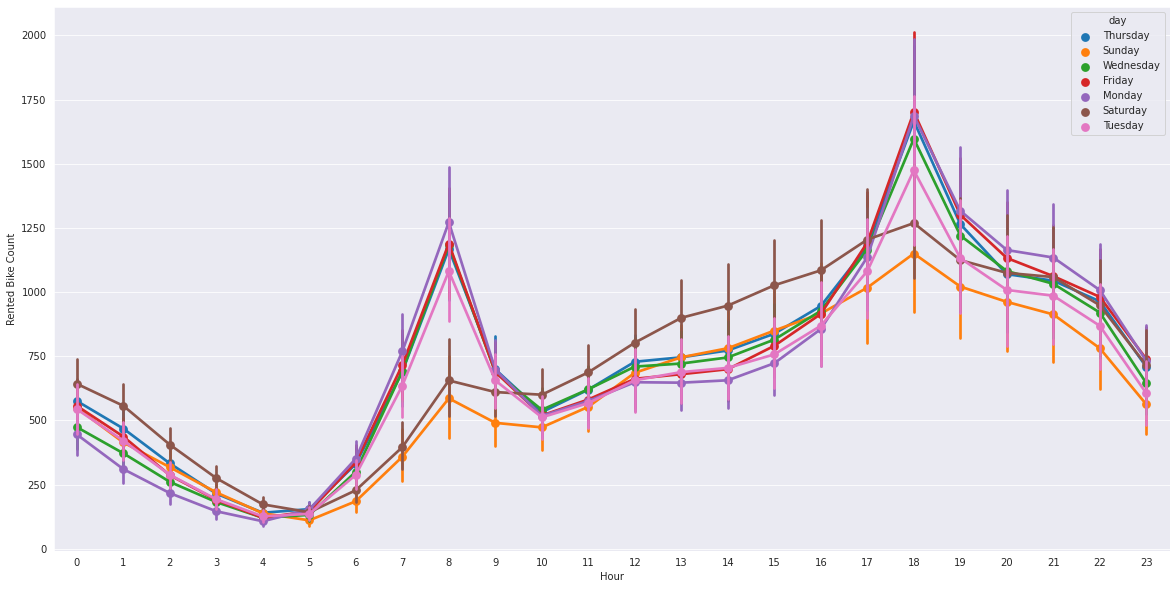

In [59]:
plt.figure(figsize=(20,10))
sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df["day"]);